In [11]:
import seaborn as sns
df = sns.load_dataset('iris')

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df = df.iloc[:,1:]

In [14]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [15]:
df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder = LabelEncoder()

In [19]:
df.species = encoder.fit_transform(df['species'])

In [21]:
df.species.unique()

array([0, 1, 2], dtype=int64)

In [25]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [26]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

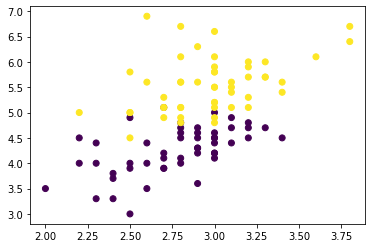

In [30]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap=None)

In [44]:
df.shape

(100, 3)

In [48]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
68,2.2,4.5,1
56,3.3,4.7,1
93,2.3,3.3,1
88,3.0,4.1,1
105,3.0,6.6,2
96,2.9,4.2,1
57,2.4,3.3,1
82,2.7,3.9,1
100,3.3,6.0,2
79,2.6,3.5,1


In [54]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [55]:
df_train

,sepal_width,petal_length,species
139,3.1,5.4,2
118,2.6,6.9,2
62,2.2,4.0,1
97,2.9,4.3,1
111,2.7,5.3,2
102,3.0,5.9,2
138,3.0,4.8,2
88,3.0,4.1,1
67,2.7,4.1,1
57,2.4,3.3,1


In [56]:
df_val

,sepal_width,petal_length,species
128,2.8,5.6,2
145,3.0,5.2,2
84,3.0,4.5,1
61,3.0,4.2,1
54,2.8,4.6,1


In [57]:
df_test

,sepal_width,petal_length,species
100,3.3,6.0,2
136,3.4,5.6,2
65,3.1,4.4,1
105,3.0,6.6,2
58,2.9,4.6,1


In [58]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [59]:
y_test

array([2, 2, 1, 1, 1])

# Case 1 - Bagging

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [60]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [63]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
88,3.0,4.1,1
97,2.9,4.3,1
139,3.1,5.4,2
102,3.0,5.9,2
57,2.4,3.3,1
67,2.7,4.1,1
62,2.2,4.0,1
97,2.9,4.3,1


In [3]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_train)
    y_pred1 = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred1))
    

In [4]:
dt_bag1 = DecisionTreeClassifier()

In [5]:
evaluate(dt_bag1,X,y)

NameError: name 'X' is not defined

In [81]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
111,2.7,5.3,2
139,3.1,5.4,2
62,2.2,4.0,1
88,3.0,4.1,1
88,3.0,4.1,1
57,2.4,3.3,1
57,2.4,3.3,1
118,2.6,6.9,2


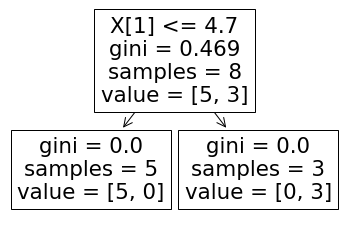

1.0


In [82]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [83]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
88,3.0,4.1,1
111,2.7,5.3,2
138,3.0,4.8,2
102,3.0,5.9,2
111,2.7,5.3,2
102,3.0,5.9,2
88,3.0,4.1,1
111,2.7,5.3,2


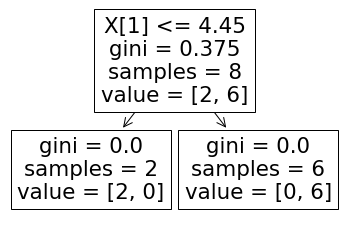

0.6


In [84]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [28]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [85]:
df_test

,sepal_width,petal_length,species
100,3.3,6.0,2
136,3.4,5.6,2
65,3.1,4.4,1
105,3.0,6.6,2
58,2.9,4.6,1


In [87]:
import numpy as np

In [89]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


# Pasting

In [50]:
# Method 1
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
126,2.8,4.8,2
125,3.2,6.0,2
140,3.1,5.6,2
64,2.9,3.6,1
142,2.7,5.1,2
82,2.7,3.9,1
135,3.0,6.1,2
122,2.8,6.7,2
109,3.6,6.1,2
95,3.0,4.2,1


In [91]:
df_train.sample(8)

,sepal_width,petal_length,species
118,2.6,6.9,2
97,2.9,4.3,1
62,2.2,4.0,1
138,3.0,4.8,2
88,3.0,4.1,1
111,2.7,5.3,2
139,3.1,5.4,2
67,2.7,4.1,1


# Random Subspaces

In [92]:
df1 = sns.load_dataset('iris')
df1 = df1.sample(10)

In [93]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
69,5.6,2.5,3.9,1.1,versicolor
139,6.9,3.1,5.4,2.1,virginica
0,5.1,3.5,1.4,0.2,setosa
102,7.1,3.0,5.9,2.1,virginica
89,5.5,2.5,4.0,1.3,versicolor
52,6.9,3.1,4.9,1.5,versicolor
110,6.5,3.2,5.1,2.0,virginica
109,7.2,3.6,6.1,2.5,virginica
123,6.3,2.7,4.9,1.8,virginica
71,6.1,2.8,4.0,1.3,versicolor


In [94]:
df1.sample(2,replace=True,axis=1)

,sepal_length,sepal_width
69,5.6,2.5
139,6.9,3.1
0,5.1,3.5
102,7.1,3.0
89,5.5,2.5
52,6.9,3.1
110,6.5,3.2
109,7.2,3.6
123,6.3,2.7
71,6.1,2.8


# Random Patches
- column sampling

In [57]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
26,5.0,3.4,1.6,0.4,setosa
15,5.7,4.4,1.5,0.4,setosa
114,5.8,2.8,5.1,2.4,virginica
18,5.7,3.8,1.7,0.3,setosa
110,6.5,3.2,5.1,2.0,virginica
53,5.5,2.3,4.0,1.3,versicolor
41,4.5,2.3,1.3,0.3,setosa
52,6.9,3.1,4.9,1.5,versicolor
40,5.0,3.5,1.3,0.3,setosa
32,5.2,4.1,1.5,0.1,setosa


In [102]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal_width,sepal_width
69,2.5,2.5
123,2.7,2.7
0,3.5,3.5
52,3.1,3.1
89,2.5,2.5
89,2.5,2.5
123,2.7,2.7
52,3.1,3.1
